### Finite difference methods for partial differential equations (PDE)

Main references

[^1]: Timothy Sauer (2017) *Numerical Analysis* 3rd Edition. (p. 348)

#### Take-aways

After studying this chapter, we will be able to

TBF



#### Overview



- We will apply a single method, finite difference method, for various problems. (In other chapters, we usually study multiple methods for a single, general problem.)

##### Problems of interest

> **Problem of interest** (Heat equation)
>
> Given $f:(a,b) \to \mathbb{R}$ and $l,r:[0,\infty)\to{\mathbb{R} }$, find $u:[0,\infty)\times[a,b] \to \mathbb{R}$ that satisfies
>     
> $$
> \left\{\begin{array}{l}
> u_t=D u_{x x} \text { for all } a \leq x \leq b, t \geq 0 \\
> u(x, 0)=f(x) \text { for all } a \leq x \leq b \\
> u(a, t)=l(t) \text { for all } t \geq 0 \\
> u(b, t)=r(t) \text { for all } t \geq 0
> \end{array}\right.
> $$


#### Common settings/Notation

| symbol | meaning |
|---|---|
| $k$ | time step size |
| $h$ | spatial grid spacing |
| $u(x_i, t_j)$ | true solution evaluated at $(x_i, t_j)$ |
| $w_{i, j}$ | numerical solution meant to approximate $u(x_i, t_j)$ |


#### Basics of PDE

<p style="color:red;">TBF</p>

- Two or more independent variables
- Briefly mention when we can find analytic solution. (separation of variable, Fourier seires/Fourier transform)
- Focus on 2nd order PDE.
  - Classification of 2nd order PDE.
  - 

##### Classfication of 2nd order PDE

Given a 2nd order PDE

$$
A u_{x x}+B u_{x y}+C u_{y y}+F\left(u_x, u_y, u, x, y\right)=0,
$$

the PDE is called

| name | condition |
|---|---|
| parabolic | $$B^2 - 4AC = 0$$ |
| hyperbolic | $$B^2 - 4AC > 0$$ |
| elliptic | $$B^2 - 4AC < 0$$ |


**Remark**

According to Sauer (2017) Numerical Analysis 3rd ed., the practical difference among the different types of PDE is:
- parabolic and hyperbolic
  - PDE is defined on an open region.
  - Boundary conditions for one variable are specified at one end of the region (initial state) and the system is solved by moving away from the boundary. (Think of time evolution.)
- elliptic
  - PDE is defined on the entire boundary of a closed region.
  - Boundary conditions are imposed literally on the boundary of the region.

#### Finite difference method for parabolic equations



##### Problem (Heat equation)

> **Problem of interest** (Heat equation)
>
> Given $f:(a,b) \to \mathbb{R}$ and $l,r:[0,\infty)\to{\mathbb{R} }$, find $u:[0,\infty)\times[a,b] \to \mathbb{R}$ that satisfies
>     
> $$
> \left\{\begin{array}{l}
> u_t=D u_{x x} \text { for all } a \leq x \leq b, t \geq 0 \\
> u(x, 0)=f(x) \text { for all } a \leq x \leq b \\
> u(a, t)=l(t) \text { for all } t \geq 0 \\
> u(b, t)=r(t) \text { for all } t \geq 0
> \end{array}\right.
> $$



**Remark** (Heat and diffusion equation)

- Heat equation is a special case of diffusion equation.
  - Diffusion equation describes spreading-out behaviors of matter. 
  - Heat equation describes transfer of heat density (i.e., temperature).
- Heat equation is a parabolic equation.

**Remark** (Interpretation of the equation given above)

- The above equation describes heat transfer of a rod (spatial dimension 1).
  - The initial temperature distribution at the location $x$ is given by $f(x)$.
  - Gain or loss of heat at the end points at time $t$ are given by $l(t)$ and $r(t)$.
  - The above equation assumes complete insulation on the lateral surface of the rod.
  - Diffusion coefficient or heat conductivity $D$ governs the rate of heat transfer: $D$ large $\rightarrow$ fast transfer; $D$ small $\rightarrow$ slow transfer.

##### Forward difference method

**Idea**: confine the domain to a set of grid points, and replace differential operators with their discrete counterparts of finite difference form.


**Grid domain**

Consider a uniform grid domain with the common settings mentioned above.

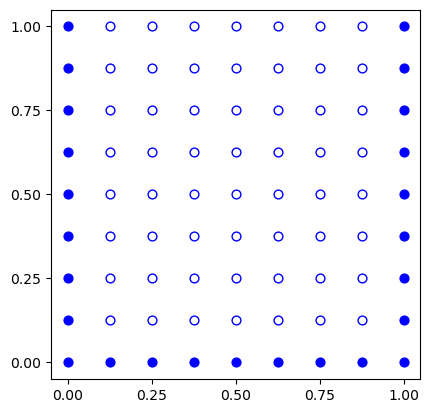

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

L = 1
T = 1
N = 8
K = 8
h = L/N
k = T/K

x = np.linspace(0, L, N+1)
t = np.linspace(0, L, N+1)
xx, tt = np.meshgrid(x, t)

# grid domain
gd = np.zeros((N+1, N+1))

gd[0, :] = 1
# gd[-1, :] = 1
gd[:, 0] = 1
gd[:, -1] = 1

"""#%% Add a stencil polygon
polygon_points = np.array([[-0.5*h, -0.5*k], [2.5*h, -0.5*k], 
        [2.5*h, 0.5*k],  [1.5*h, 0.5*k], [1.5*h, 1.5*k],
        [0.5*h, 1.5*k], [0.5*h, 0.5*k], [-0.5*h, 0.5*k]])
ax.add_patch(plt.Polygon(polygon_points, closed=True, fill=None, edgecolor='r'))
"""

ax.scatter(xx[gd==0], tt[gd==0], c='w', edgecolors='b', s=40)
ax.scatter(xx[gd==1], tt[gd==1], c='b', s=40)
ax.set_aspect('equal')
ax.set_xticks(x[::2])
ax.set_yticks(t[::2])

plt.show()



**Centered-difference for 2nd derivative**

$$
u_{x x}(x, t) \approx \frac{1}{h^2}(u(x+h, t)-2 u(x, t)+u(x-h, t))
$$

**Forward difference for 1st derivative**

$$
u_t(x, t) \approx \frac{1}{k}(u(x, t+k)-u(x, t))
$$

Replace $u_xx$ and $u_t$ with these formulas in the heat equations:

$$
\frac{D}{h^2}\left(w_{i+1, j}-2 w_{i j}+w_{i-1, j}\right) = \frac{1}{k}\left(w_{i, j+1}-w_{i j}\right)
$$

**Stencil** (dependency of numerical data)

Rearrange the discrete version of heat equation:

$$
w_{i, j+1} =w_{i j}+\frac{D k}{h^2}\left(w_{i+1, j}-2 w_{i j}+w_{i-1, j}\right) 
$$

![Forward difference stencil](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Explicit_method-stencil.svg/2880px-Explicit_method-stencil.svg.png)

The figure uses different index from us. Substitute:

- $n\gets i$
- $i\gets j$

Figure: Wikipedia

Verify that our grid domain can be fully determined by the initial and boundary data using the stencil.

##### Convergence of forward difference method

To be detailed:

- error of the discretization
- "stability + consistency = convergence" still works as in ODE.

#### Finite difference method for hyperbolic equations



##### Problem (Wave equation)

<p style="color:red;">To be updated</p>

> **Problem of interest** (Heat equation)
>
> Given $f:(a,b) \to \mathbb{R}$ and $l,r:[0,\infty)\to{\mathbb{R} }$, find $u:[0,\infty)\times[a,b] \to \mathbb{R}$ that satisfies
>     
> $$
> \left\{\begin{array}{l}
> u_t=D u_{x x} \text { for all } a \leq x \leq b, t \geq 0 \\
> u(x, 0)=f(x) \text { for all } a \leq x \leq b \\
> u(a, t)=l(t) \text { for all } t \geq 0 \\
> u(b, t)=r(t) \text { for all } t \geq 0
> \end{array}\right.
> $$



**Remark** (Basic intuition of wave equation)

- $u_t$ is not the speed of the wave. It is the time derivative of the amplitude of the wave. 
- d'Alembert's formula gives the sense of why $c$ is the speed of the wave.
  - d'Alembert's formula gives the analytic solution for certain initial and boundary condition. (See Wikipedia page for details.)


**Remark** (Constructing finite difference method)

- 1st time step
  - To keep 2nd order accuracy, we use centered-difference quotient when incorporating $u_t$ from the initial data.
  - This introduces a negative time index $w_{i,-1}$. However, this can be resolved by combining (a) the initial data and (b) finite difference formula for time marching ($j=0$).
  - Though this may look unphysical (involvement of negative time), there is no problem from the degrees of freedom point of view: use right amount of information to specify right amount of unknowns. 

**Remark** (stability of wave equation)

- Notice the trick that when a numerical update involves past two steps of history, we may consider stacking two sets to make higher dimensional problem. This is reminescent of converting 2nd order ODE to vector form of 1st order ODE.
- The CFL condition for the wave equation says "the distance traveled by the wave ($ck$) in unit time must not exceed the spatial spacing $h$." 
- The theorem says that the CFL condition is a sufficient condition for stability in the wave equation. However, this is not true for more general hyperbolic equations. ( Sauer (2017) p. 417 )

---
This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)